In [29]:
%%writefile convolution.py
"""
Simple implementation using convolution.
AUTHOR: ASHWINKUMAR GANESAN.
"""
%matplotlib inline

import theano
from theano import tensor as T
from theano.tensor.nnet import conv

import pylab
from PIL import Image
from cairocffi import *

Writing convolution.py


In [16]:
import numpy

In [17]:
rng = numpy.random.RandomState(23455)

In [18]:
input = T.tensor4(name='input')

In [19]:
w_shp = (2, 3, 9, 9)
w_bound = numpy.sqrt(3 * 9 * 9)
W = theano.shared( numpy.asarray(
            rng.uniform(
                low=-1.0 / w_bound,
                high=1.0 / w_bound,
                size=w_shp),
            dtype=input.dtype), name ='W')

In [20]:
b_shp = (2,)
b = theano.shared(numpy.asarray(
            rng.uniform(low=-.5, high=.5, size=b_shp),
            dtype=input.dtype), name ='b')

In [21]:
conv_out = conv.conv2d(input, W)

In [22]:
output = T.nnet.sigmoid(conv_out + b.dimshuffle('x', 0, 'x', 'x'))

In [23]:
f = theano.function([input], output, allow_input_downcast=True)

In [24]:
img = Image.open(open('images/birds.jpg', 'rb'))

In [25]:
img = numpy.asarray(img, dtype='float64') / 256.

In [26]:
img_ = img.transpose(2, 0, 1).reshape(1, 3, 1140, 550)
filtered_img = f(img_)

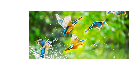

In [27]:
# plot original image and first and second components of output
pylab.subplot(1, 3, 1); pylab.axis('off'); pylab.imshow(img)
pylab.gray();

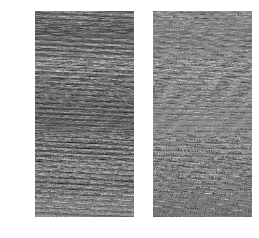

In [28]:
pylab.subplot(1, 3, 2); pylab.axis('off'); pylab.imshow(filtered_img[0, 0, :, :])
pylab.subplot(1, 3, 3); pylab.axis('off'); pylab.imshow(filtered_img[0, 1, :, :])
pylab.show()